Import library yg di gunakan

# Data Preparation

In [28]:
import pandas as pd
import numpy as npnp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
taxis_df = sns.load_dataset("taxis")
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [30]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

# Data Cleansing

In [31]:
missing_values = taxis_df.isnull().sum()
missing_percentages = (missing_values / len(taxis_df)) * 100
missing_info = pd.DataFrame({
    'Column' : missing_values.index,
    'Missing Values' : missing_values.values,
    'Missing Percentage' : missing_percentages.values
})

print(missing_info)

             Column  Missing Values  Missing Percentage
0            pickup               0            0.000000
1           dropoff               0            0.000000
2        passengers               0            0.000000
3          distance               0            0.000000
4              fare               0            0.000000
5               tip               0            0.000000
6             tolls               0            0.000000
7             total               0            0.000000
8             color               0            0.000000
9           payment              44            0.683973
10      pickup_zone              26            0.404166
11     dropoff_zone              45            0.699518
12   pickup_borough              26            0.404166
13  dropoff_borough              45            0.699518


In [32]:
#check value counts for categorical data

taxis_df.value_counts(['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'])

payment      pickup_zone               dropoff_zone              pickup_borough  dropoff_borough
credit card  Upper East Side North     Upper East Side North     Manhattan       Manhattan          26
             Upper East Side South     Upper East Side North     Manhattan       Manhattan          22
             Upper East Side North     Upper East Side South     Manhattan       Manhattan          18
             Upper West Side South     Lincoln Square East       Manhattan       Manhattan          17
cash         Astoria                   Astoria                   Queens          Queens             16
                                                                                                    ..
credit card  Central Harlem            Upper West Side South     Manhattan       Manhattan           1
                                       West Concourse            Manhattan       Bronx               1
                                       Williamsbridge/Olinville  Manhattan     

In [33]:
taxis_df.pickup_zone.value_counts()

pickup_zone
Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: count, Length: 194, dtype: int64

In [34]:
taxis_df.dropoff_zone.value_counts()

dropoff_zone
Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach                 1
Ozone Park                     1
Name: count, Length: 203, dtype: int64

In [35]:
#drop the columns

taxis_df.drop(['pickup_zone', 'dropoff_zone'], axis=1, inplace = True)

In [36]:
#check the percentage of Payment column
taxis_df['payment'].isna().sum()/taxis_df.shape[0]

0.006839732628633608

In [37]:
taxis_df.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

In [38]:
#cleaning for categorical data

val = taxis_df.payment.mode().values[0]
taxis_df['payment'] = taxis_df.payment.fillna(val)

In [39]:
#check it again

taxis_df.payment.value_counts()

payment
credit card    4621
cash           1812
Name: count, dtype: int64

In [40]:
#check the percentage of Pickup_borough column
taxis_df['pickup_borough'].isna().sum()/taxis_df.shape[0]

0.004041660189647132

In [41]:
taxis_df.pickup_borough.value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

In [42]:
#cleaning for categorical data

val = taxis_df.pickup_borough.mode().values[0]
taxis_df['pickup_borough'] = taxis_df.pickup_borough.fillna(val)

In [43]:
#check it again

taxis_df.pickup_borough.value_counts()

pickup_borough
Manhattan    5294
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

In [44]:
#check the percentage of Dropoff_borough column
taxis_df['dropoff_borough'].isna().sum()/taxis_df.shape[0]

0.00699518109746619

In [45]:
taxis_df.dropoff_borough.value_counts()

dropoff_borough
Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: count, dtype: int64

In [46]:
#cleaning for categorical data

val = taxis_df.dropoff_borough.mode().values[0]
taxis_df['dropoff_borough'] = taxis_df.dropoff_borough.fillna(val)

In [47]:
#check it again

taxis_df.dropoff_borough.value_counts()

dropoff_borough
Manhattan        5251
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: count, dtype: int64

In [48]:
#show the cleaning data

taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan


In [49]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6433 non-null   object        
 10  pickup_borough   6433 non-null   object        
 11  dropoff_borough  6433 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 603.2+ KB


# **EDA**

**Tampilkan 5 Tanggal (tanggal bulan tahun) dengan jumlah dan nilai transaksi terbanyak**

In [71]:
# Menghitung total nilai transaksi (fare + tip + tolls) untuk setiap perjalanan
taxis_df['total_transaction'] = taxis_df['fare'] + taxis_df['tip'] + taxis_df['tolls']

In [73]:
# Mengelompokkan data berdasarkan tanggal pickup, kemudian menghitung jumlah dan nilai transaksi untuk setiap tanggal
daily_transactions = taxis_df.groupby(taxis_df['pickup'].dt.date).agg({'total_transaction': ['sum', 'count']})

print(daily_transactions)

           total_transaction      
                         sum count
pickup                            
2019-02-28              5.00     1
2019-03-01           3449.78   241
2019-03-02           2720.77   198
2019-03-03           2529.92   169
2019-03-04           2734.08   171
2019-03-05           3649.78   228
2019-03-06           3885.46   257
2019-03-07           3376.20   218
2019-03-08           3753.76   235
2019-03-09           3164.20   204
2019-03-10           2669.94   185
2019-03-11           3359.31   209
2019-03-12           3180.60   218
2019-03-13           4094.31   244
2019-03-14           3914.25   260
2019-03-15           3398.79   201
2019-03-16           3223.58   220
2019-03-17           2940.20   178
2019-03-18           2711.13   173
2019-03-19           3329.07   201
2019-03-20           3791.15   233
2019-03-21           3631.63   221
2019-03-22           3530.46   229
2019-03-23           2736.98   209
2019-03-24           2171.96   149
2019-03-25          

In [89]:
# Menamai ulang kolom hasil agregasi
daily_transactions.columns = ['total_value', 'total_count']

# Mengurutkan berdasarkan total nilai transaksi secara menurun
daily_transactions = daily_transactions.sort_values(by='total_value', ascending=False)

print(daily_transactions)

            total_value  total_count
pickup                              
2019-03-13      4094.31          244
2019-03-14      3914.25          260
2019-03-06      3885.46          257
2019-03-20      3791.15          233
2019-03-08      3753.76          235
2019-03-27      3687.67          232
2019-03-05      3649.78          228
2019-03-21      3631.63          221
2019-03-22      3530.46          229
2019-03-01      3449.78          241
2019-03-15      3398.79          201
2019-03-07      3376.20          218
2019-03-30      3365.19          215
2019-03-11      3359.31          209
2019-03-19      3329.07          201
2019-03-28      3231.14          205
2019-03-16      3223.58          220
2019-03-12      3180.60          218
2019-03-09      3164.20          204
2019-03-29      3087.67          209
2019-03-17      2940.20          178
2019-03-26      2780.75          178
2019-03-23      2736.98          209
2019-03-04      2734.08          171
2019-03-02      2720.77          198
2

In [90]:
# Mengambil 5 tanggal teratas
top_5_dates = daily_transactions.head(5)

# Menampilkan hasil
print(top_5_dates)

            total_value  total_count
pickup                              
2019-03-13      4094.31          244
2019-03-14      3914.25          260
2019-03-06      3885.46          257
2019-03-20      3791.15          233
2019-03-08      3753.76          235


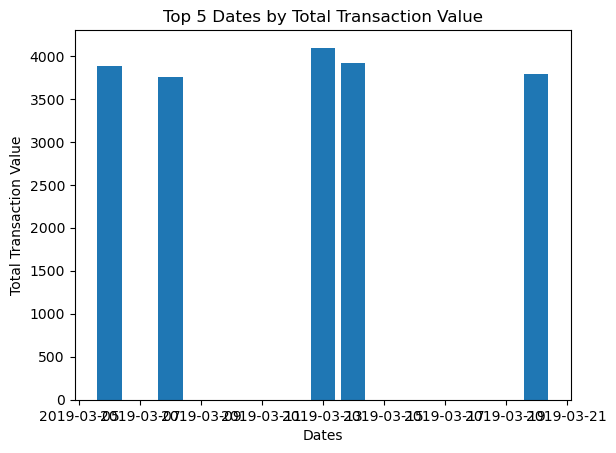

In [99]:
# Mengambil nilai indeks tanggal dan nilai transaksi dari DataFrame top_5_dates
dates = top_5_dates.index
transaction_values = top_5_dates['total_value']

# Membuat bar chart
plt.bar(dates, transaction_values)

# Memberi label pada sumbu x dan y
plt.xlabel('Dates')
plt.ylabel('Total Transaction Value')

# Memberi judul pada plot
plt.title("Top 5 Dates by Total Transaction Value")

# Menampilkan plot
plt.show()

In [68]:
# Menghitung total nilai transaksi (fare + tip + tolls) untuk setiap perjalanan
taxis_df['total_transaction'] = taxis_df['fare'] + taxis_df['tip'] + taxis_df['tolls']

# Mengelompokkan data berdasarkan tanggal pickup, kemudian menghitung jumlah dan nilai transaksi untuk setiap tanggal
daily_transactions = taxis_df.groupby(taxis_df['pickup'].dt.date).agg({'total_transaction': ['sum', 'count']})

# Menamai ulang kolom hasil agregasi
daily_transactions.columns = ['total_value', 'total_harga']

# Mengurutkan berdasarkan total nilai transaksi secara menurun
daily_transactions = daily_transactions.sort_values(by='total_value', ascending=False)

# Mengambil 5 tanggal teratas
top_5_dates = daily_transactions.head(5)

# Menampilkan hasil
print(top_5_dates)


            total_value  total_harga
pickup                              
2019-03-13      4094.31          244
2019-03-14      3914.25          260
2019-03-06      3885.46          257
2019-03-20      3791.15          233
2019-03-08      3753.76          235


In [64]:
#import pandas as pd

# Membaca data dari file CSV atau sumber lainnya
#data = pd.read_csv('nama_file.csv')  # Ganti 'nama_file.csv' dengan nama file sesuai dengan data Anda

# Konversi kolom 'pickup' menjadi tipe data datetime jika belum dalam format tersebut
#data['pickup'] = pd.to_datetime(data['pickup'])

# Menghitung total nilai transaksi (fare + tip + tolls) untuk setiap perjalanan
taxis_df['total_transaction'] = taxis_df['fare'] + taxis_df['tip'] + taxis_df['tolls']

# Mengelompokkan data berdasarkan tanggal pickup, kemudian menghitung jumlah dan nilai transaksi untuk setiap tanggal
daily_transactions = taxis_df.groupby(taxis_df['pickup'].dt.date).agg({'total_transaction': ['sum', 'count']})

# Menamai ulang kolom hasil agregasi
daily_transactions.columns = ['total_value', 'total_count']

# Mengurutkan berdasarkan total nilai transaksi secara menurun
daily_transactions = daily_transactions.sort_values(by='total_value', ascending=False)

# Mengambil 5 tanggal teratas
top_5_dates = daily_transactions.head(5)

# Menampilkan hasil
print(top_5_dates)


            total_value  total_count
pickup                              
2019-03-13      4094.31          244
2019-03-14      3914.25          260
2019-03-06      3885.46          257
2019-03-20      3791.15          233
2019-03-08      3753.76          235


In [60]:
#import pandas as pd

# Membaca data dari file CSV atau dari sumber lainnya
#data = pd.read_csv('nama_file.csv')  # Ganti 'nama_file.csv' dengan nama file sesuai dengan data Anda

# Konversi kolom 'pickup' dan 'dropoff' menjadi tipe data datetime jika belum dalam format tersebut
#data['pickup'] = pd.to_datetime(data['pickup'])
#data['dropoff'] = pd.to_datetime(data['dropoff'])

# Menghitung total nilai transaksi (fare + tip + tolls) untuk setiap perjalanan
taxis_df['total_transaction'] = taxis_df['fare'] + taxis_df['tip'] + taxis_df['tolls']

# Mengelompokkan data berdasarkan jumlah penumpang, kemudian mengambil 5 perjalanan dengan total transaksi tertinggi dalam setahun
#top_5_passengers = taxis_df.groupby('passengers').apply(lambda x: x.nlargest(5, 'total_transaction')).reset_index(drop=False)

# Menampilkan hasil
#print(top_5_passengers)


In [62]:
# Mengelompokkan data berdasarkan jumlah penumpang, kemudian mengambil 5 perjalanan dengan total transaksi tertinggi dalam setahun
top_5_passengers = taxis_df.groupby('payment').apply(lambda x: x.nlargest(5, 'total_transaction')).reset_index(drop=False)

ValueError: cannot insert payment, already exists

In [ ]:
Harga fare termurah dan termahal yang di ukur berdasarkan tempat awal dan tempat tujuan

In [9]:
result = taxis_df.groupby('pickup_borough').agg({'fare': ['mean', 'max', 'min'],
                                      #'distance': 'mean',
                                      #'total': 'mean'})

#columns = ['harga rata', 'harga max', 'harga min', 'distance', 'total']

#print(result)

In [27]:
result = taxis_df.groupby('distance').agg({
    'total': 'count',  # Menghitung jumlah properti (menggunakan kolom 'neighbourhood')
    'fare': 'mean'  # Menghitung rata-rata harga (menggunakan kolom 'price')
})

#result.columns = ['jarak', 'rerata_total_yg_harus_dibayar', 'apa']

print(result)

          total       fare
distance                  
0.00         51   20.47451
0.01          1    2.50000
0.02          3    2.50000
0.03          1    2.50000
0.04          1    2.50000
...         ...        ...
30.23         1   52.00000
33.46         1  150.00000
33.76         1  143.50000
36.66         1   96.50000
36.70         1  150.00000

[1079 rows x 2 columns]
